Census-data-description:

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Import Dataset
Exploratory Data Analysis
Handling Missing Values
Feature Scaling
Train-split-test
Building Model
Evaluation
Fine Tune Model if necessary

In [2]:
import pandas as pd
import numpy as np
import re

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize

#machine learning kits #logistic,knn,svm,decisiontree,randomforest,XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Import Data

In [3]:
# Import Data
adult_train = pd.read_csv('./adult.data', header=None, names=['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation','relationship','race','sex',
                'capital-gain','capital-loss','hours-per-week',
                'native-country','income'])
adult_test = pd.read_csv('./adult.test', header=0, names=['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation','relationship','race','sex',
                'capital-gain','capital-loss','hours-per-week',
                'native-country','income'])
# fnlwgt = final weight
# education-num = duration of education in years

In [4]:
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Check for missing values
adult_train.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [8]:
adult_train.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [9]:
adult_train.shape

(32561, 15)

In [10]:
adult_test.shape

(16281, 15)

In [11]:
#drop duplicate values
adult_train.drop_duplicates(inplace=True)
adult_test.drop_duplicates(inplace=True)

# EDA

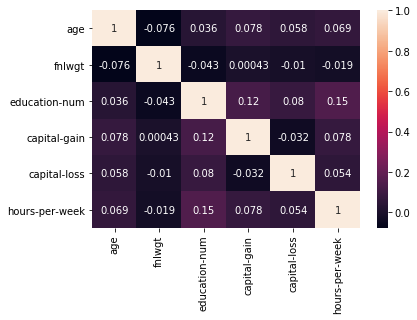

In [12]:
sns.heatmap(adult_train.corr(),annot=True)

In [13]:
# education-num can represent education
# relationship represents individual's role in the family
# fnlwgt is dropped to simplify analysis
# adult_train.drop(['fnlwgt','education','relationship'],axis=1,inplace=True)
# adult_test.drop(['fnlwgt','education','relationship'],axis=1,inplace=True)
adult_train.drop(['education','relationship'],axis=1,inplace=True)
adult_test.drop(['education','relationship'],axis=1,inplace=True)

In [14]:
adult_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [15]:
adult_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


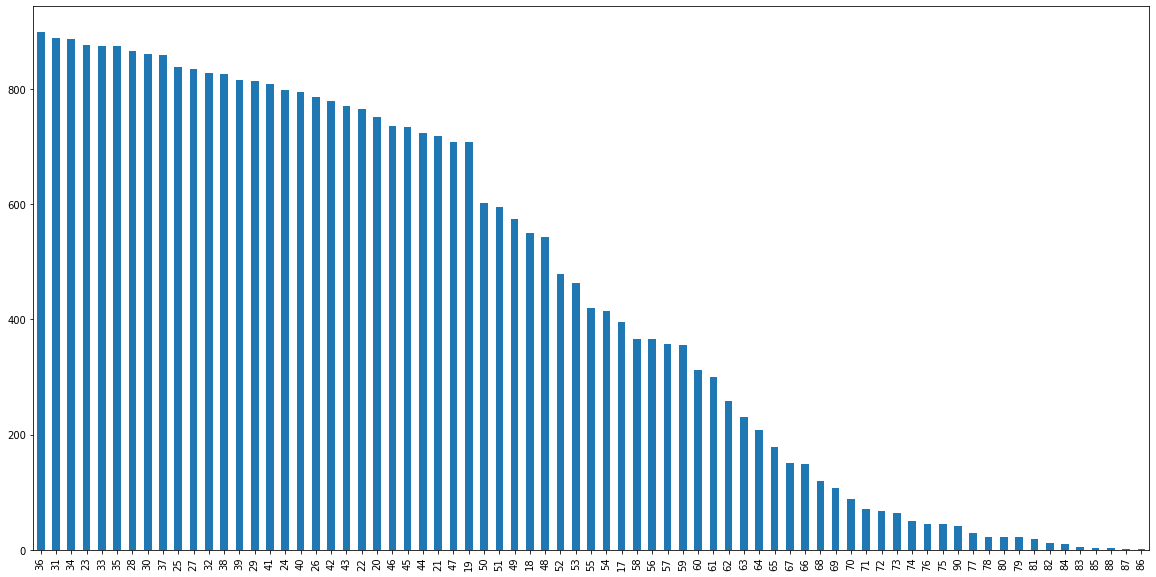

In [16]:
adult_train['age'].value_counts().plot(kind='bar',figsize=(20,10))

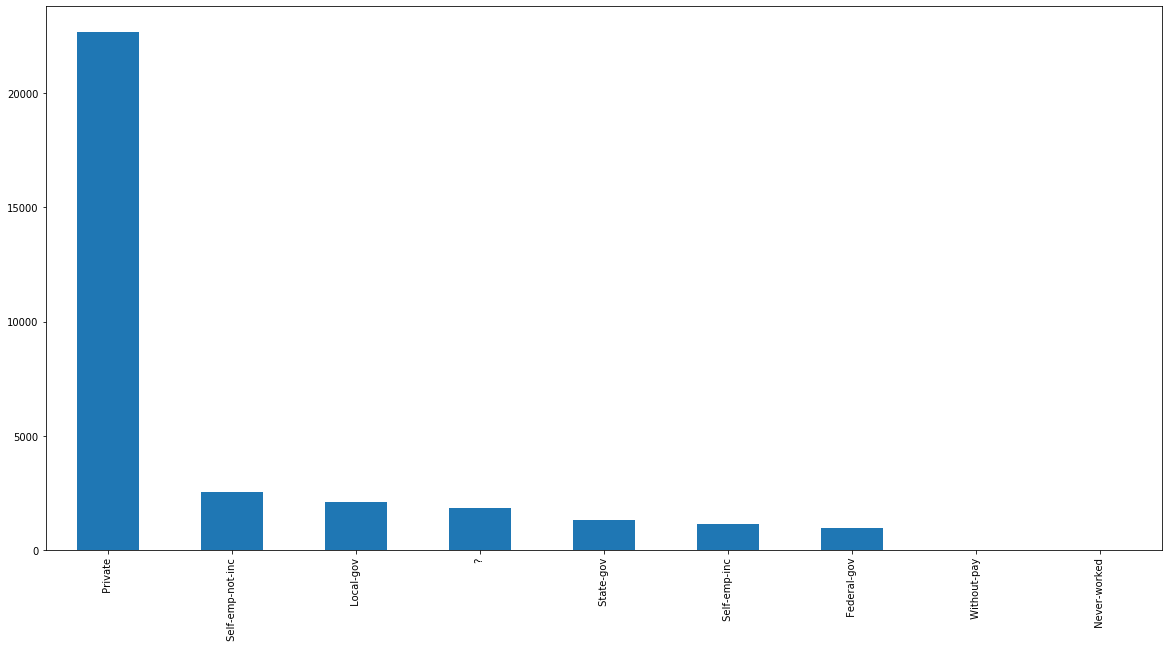

In [17]:
adult_train['workclass'].value_counts().plot(kind='bar',figsize=(20,10))

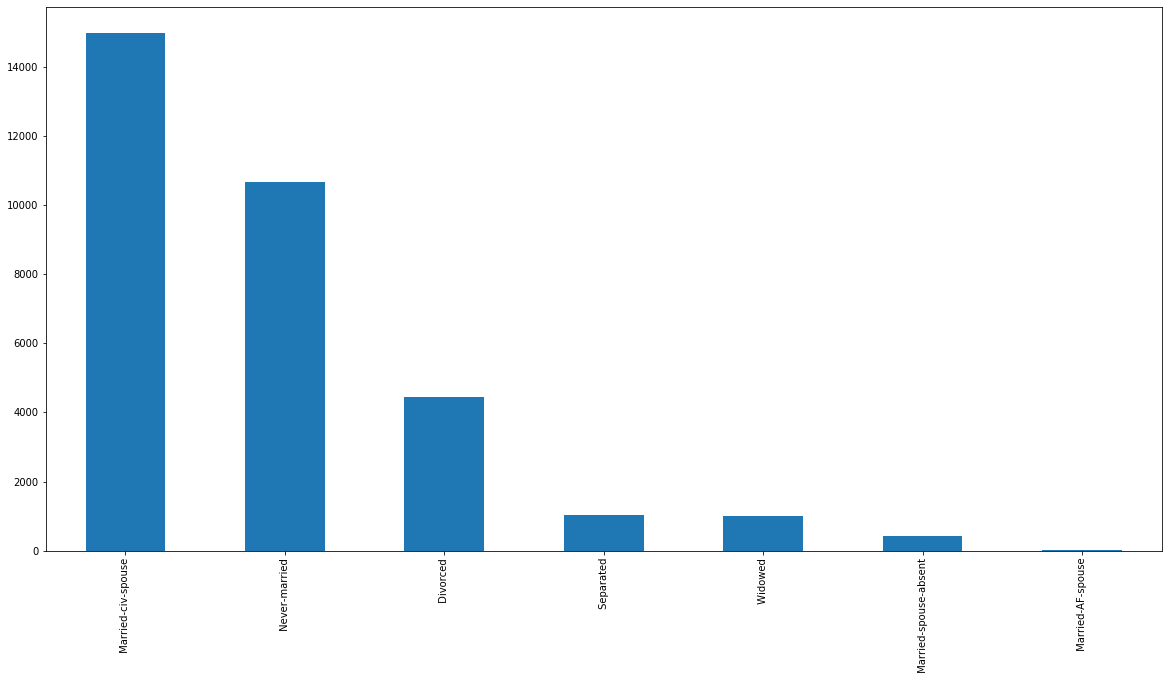

In [18]:
adult_train['marital-status'].value_counts().plot(kind='bar',figsize=(20,10))

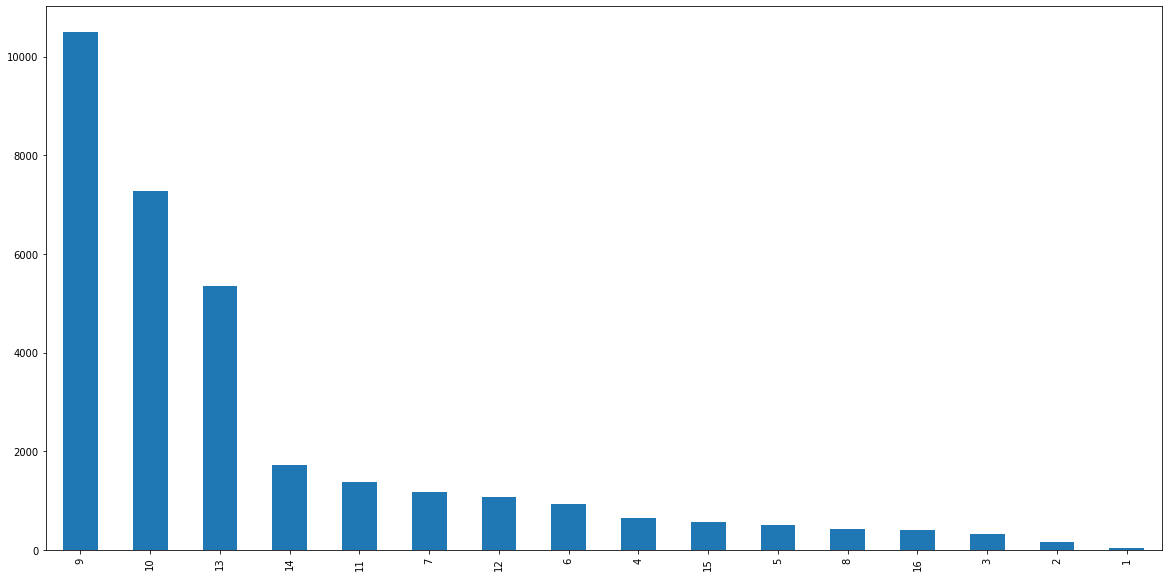

In [19]:
adult_train['education-num'].value_counts().plot(kind='bar',figsize=(20,10))

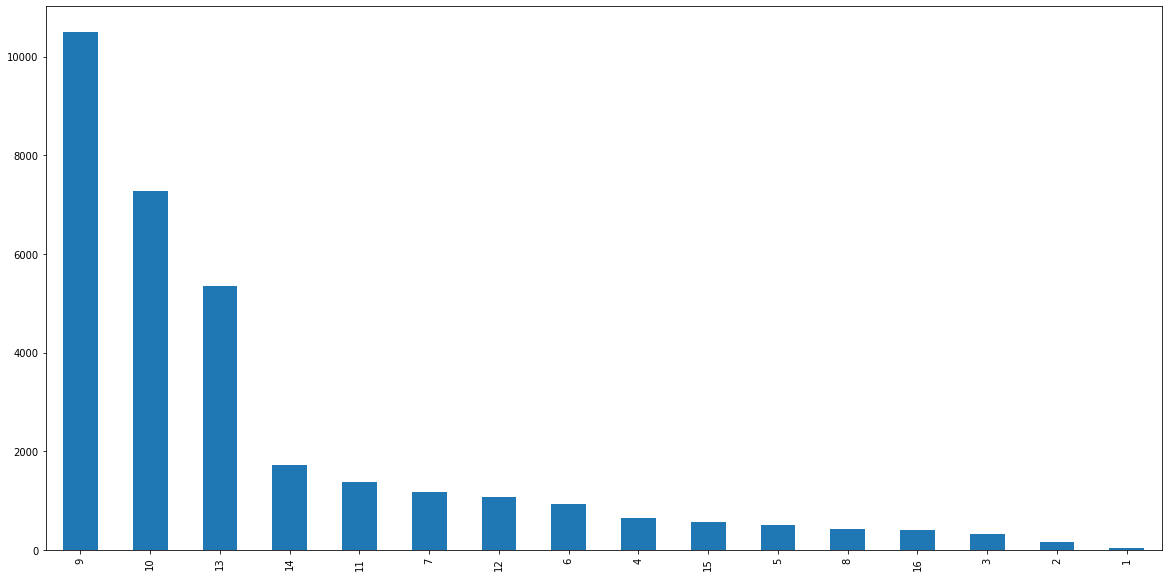

In [20]:
adult_train['education-num'].value_counts().plot(kind='bar',figsize=(20,10))

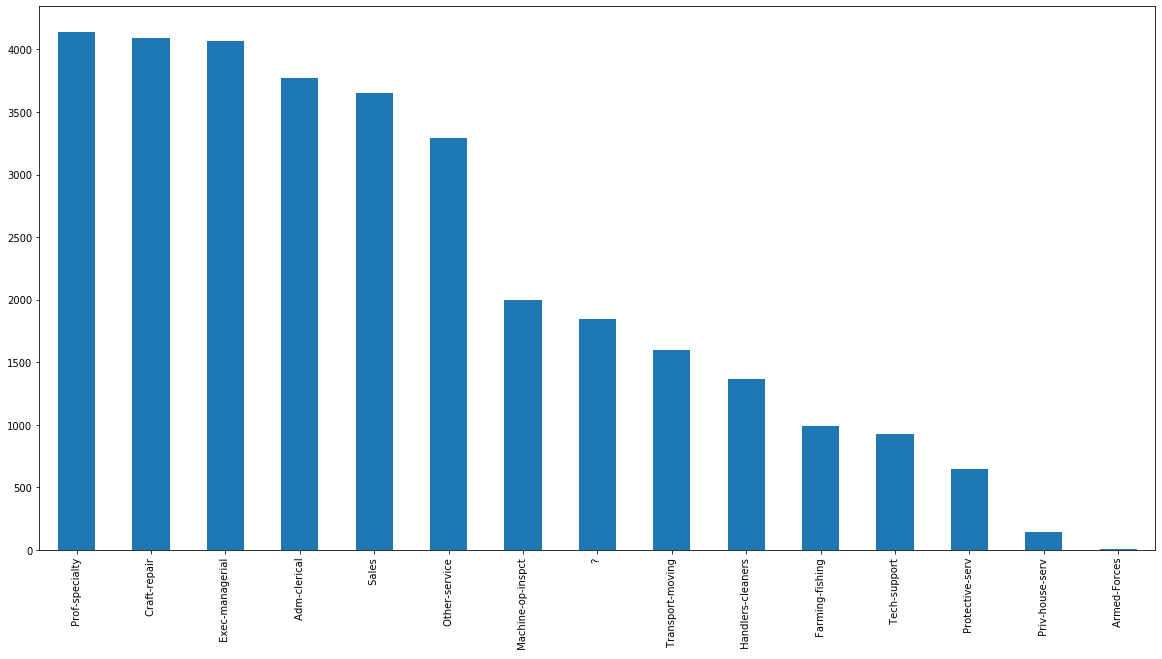

In [21]:
adult_train['occupation'].value_counts().plot(kind='bar',figsize=(20,10))

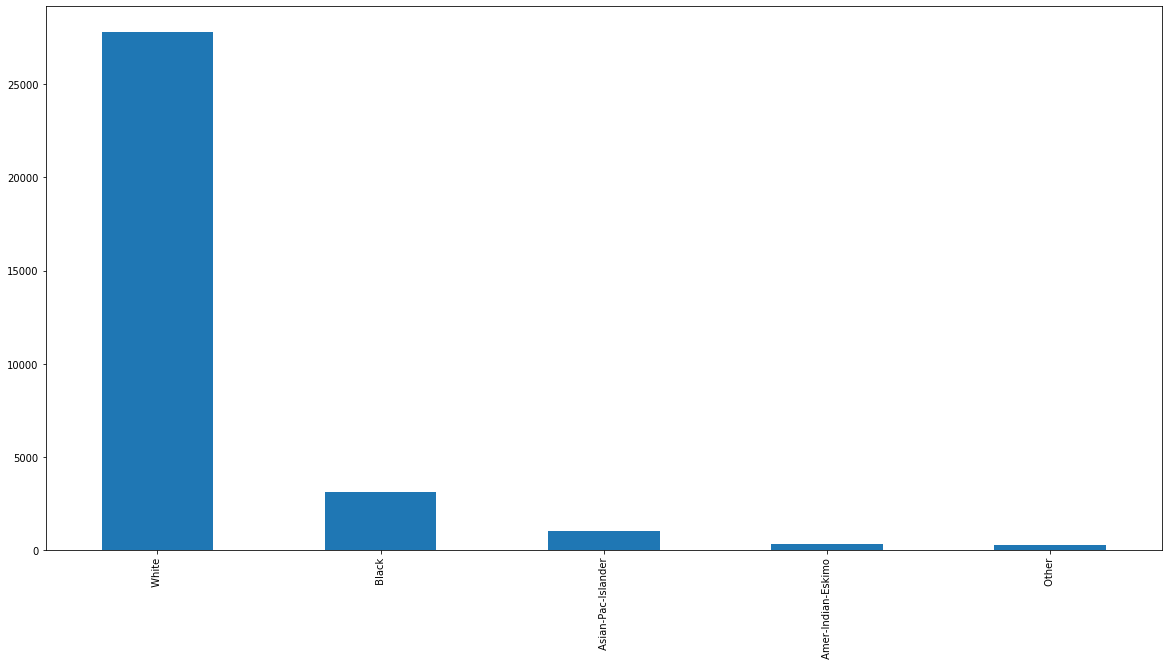

In [22]:
adult_train['race'].value_counts().plot(kind='bar',figsize=(20,10))

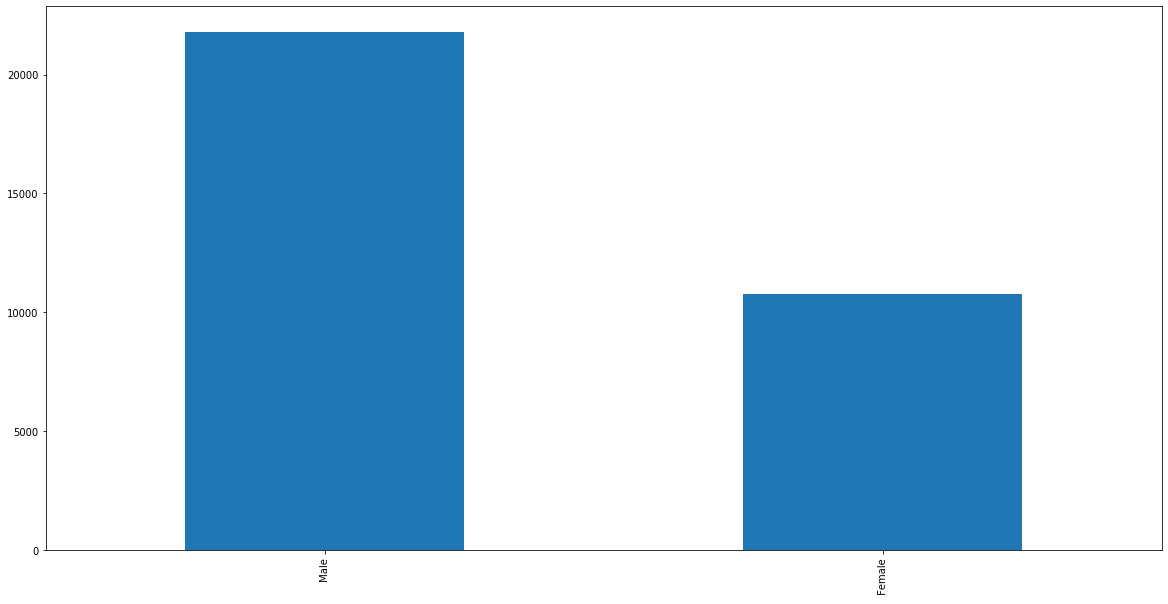

In [23]:
adult_train['sex'].value_counts().plot(kind='bar',figsize=(20,10))

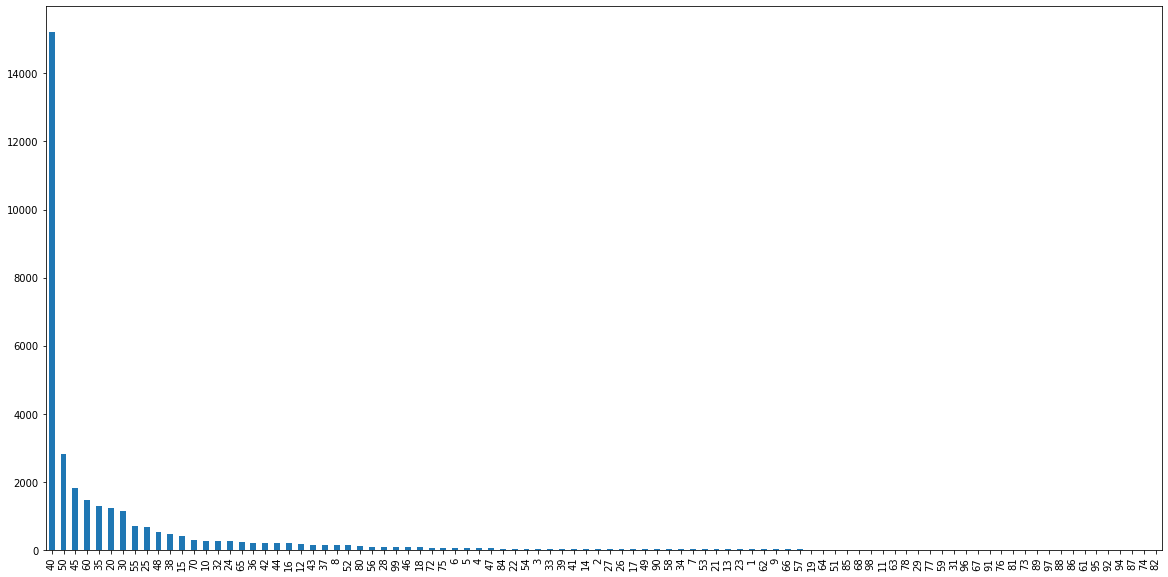

In [24]:
adult_train['hours-per-week'].value_counts().plot(kind='bar',figsize=(20,10))

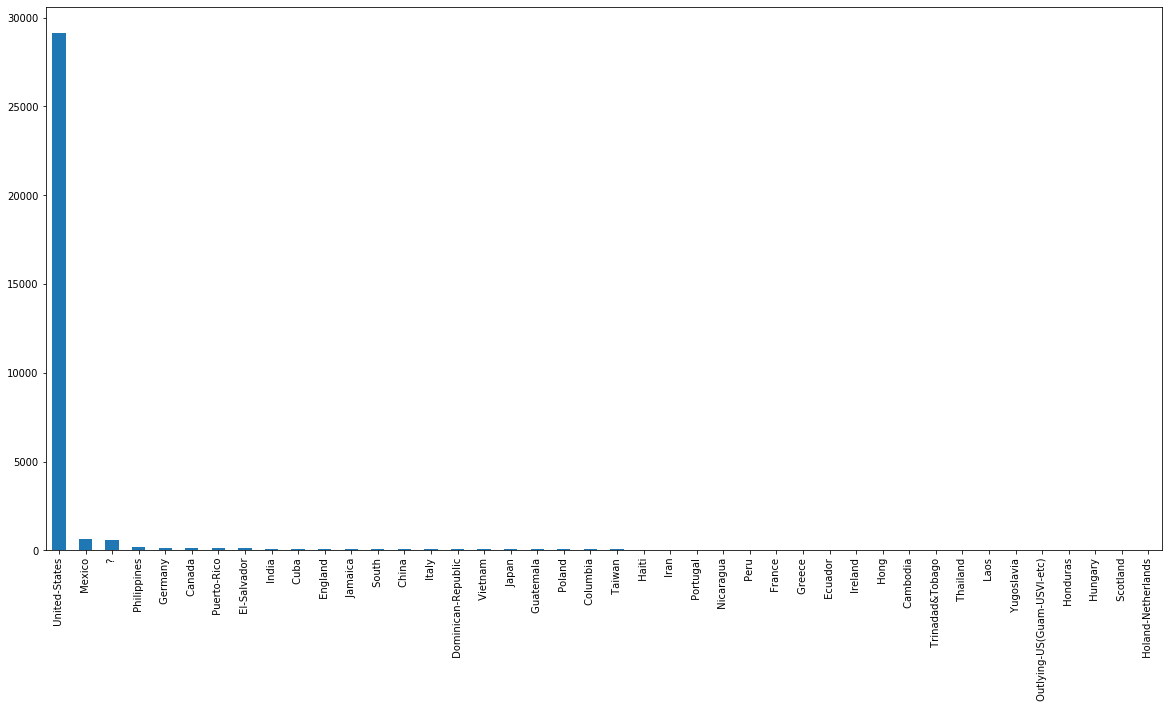

In [25]:
adult_train['native-country'].value_counts().plot(kind='bar',figsize=(20,10))

In [26]:
# adult_train['income'] = adult_train['income'].astype('category')
# adult_train['income_cat'] = adult_train['income'].cat.codes

In [27]:
# adult_train['native-country'] = adult_train['native-country'].astype('category')
# adult_train['country_cat'] = adult_train['native-country'].cat.codes

In [28]:
# adult_train['sex'] = adult_train['sex'].astype('category')
# adult_train['sex_cat'] = adult_train['sex'].cat.codes

In [29]:
# adult_train['occupation'] = adult_train['occupation'].astype('category')
# adult_train['occupation_cat'] = adult_train['occupation'].cat.codes

In [30]:
# adult_train['marital-status'] = adult_train['marital-status'].astype('category')
# adult_train['marital_cat'] = adult_train['marital-status'].cat.codes

In [31]:
# adult_train['race'] = adult_train['race'].astype('category')
# adult_train['race_cat'] = adult_train['race'].cat.codes
# adult_train

In [32]:
# adult_test['income'] = adult_test['income'].astype('category')
# adult_test['income_cat'] = adult_test['income'].cat.codes

In [33]:
# adult_test['native-country'] = adult_test['native-country'].astype('category')
# adult_test['country_cat'] = adult_test['native-country'].cat.codes

In [34]:
# adult_test['sex'] = adult_test['sex'].astype('category')
# adult_test['sex_cat'] = adult_test['sex'].cat.codes

In [35]:
# adult_test['occupation'] = adult_test['occupation'].astype('category')
# adult_test['occupation_cat'] = adult_test['occupation'].cat.codes

In [36]:
# adult_test['marital-status'] = adult_test['marital-status'].astype('category')
# adult_test['marital_cat'] = adult_test['marital-status'].cat.codes

In [37]:
# adult_test['race'] = adult_test['race'].astype('category')
# adult_test['race_cat'] = adult_test['race'].cat.codes
# adult_test

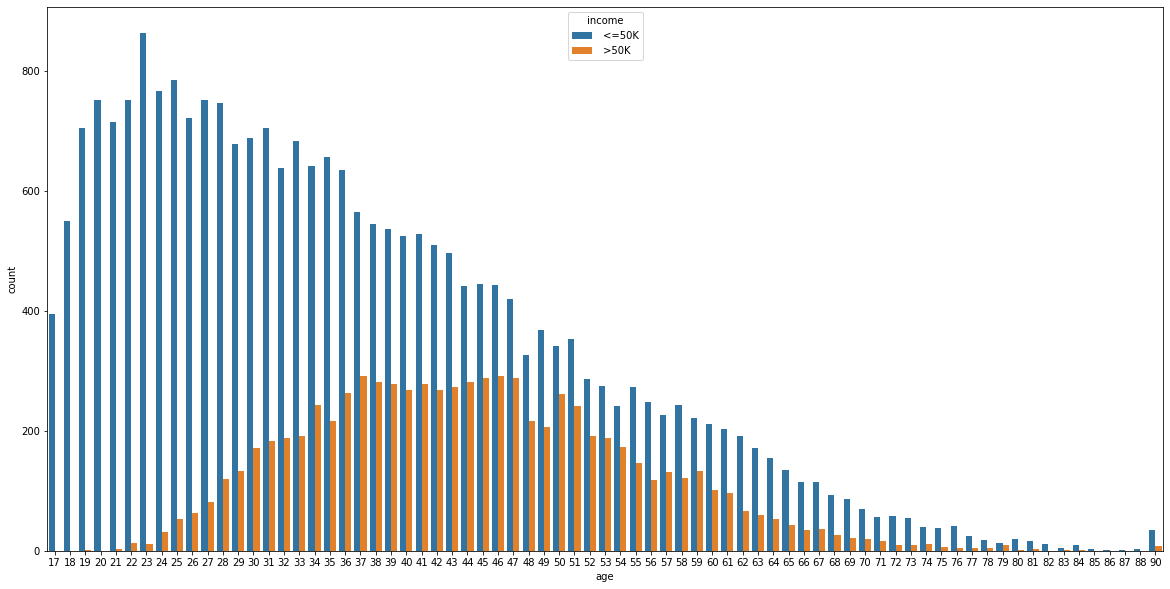

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(data=adult_train, x='age',hue='income')

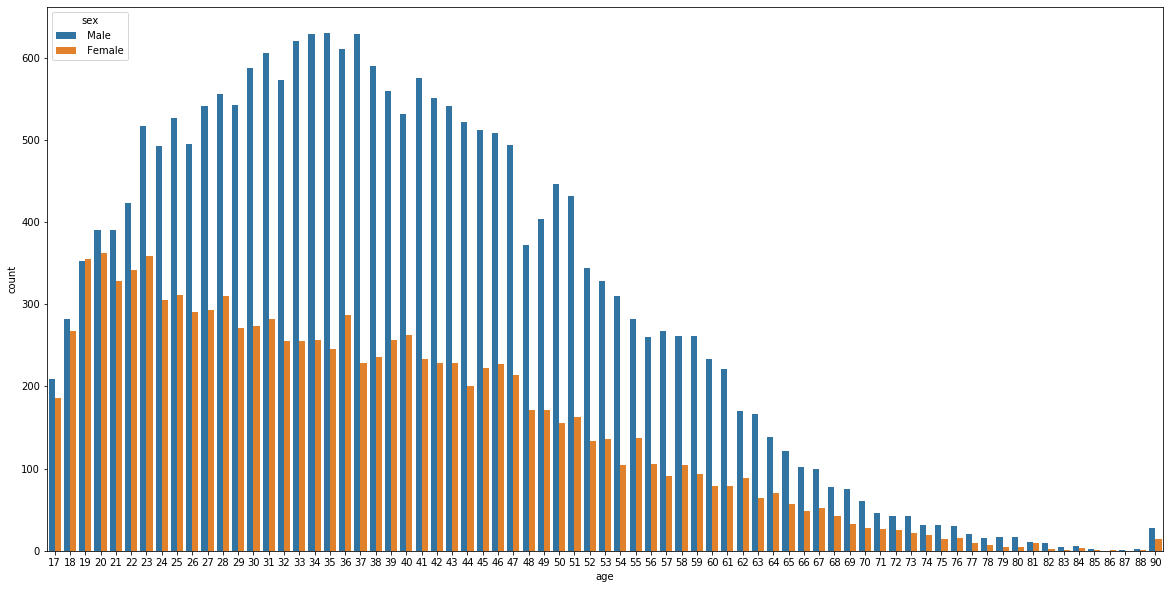

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data=adult_train, x='age',hue='sex')

In [40]:
# Relationship between class of work and income level
adult_train['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [41]:
adult_train.replace(regex=['Self-emp-not-inc','Self-emp-inc'],value='Self-Employed',inplace=True)
adult_test.replace(regex=['Self-emp-not-inc','Self-emp-inc'],value='Self-Employed',inplace=True)

In [42]:
adult_train.replace(regex=['State-gov','Federal-gov','Local-gov'],value='Government',inplace=True)
adult_test.replace(regex=['State-gov','Federal-gov','Local-gov'],value='Government',inplace=True)

In [43]:
adult_train.replace(regex=[r'\?','Without-pay','Never-worked'],value='Other/Unknown',inplace=True)
adult_test.replace(regex=[r'\?','Without-pay','Never-worked'],value='Other/Unknown',inplace=True)

In [44]:
adult_train['workclass'].value_counts()

 Private          22673
 Government        4351
 Self-Employed     3656
 Other/Unknown     1857
Name: workclass, dtype: int64

In [45]:
adult_test['workclass'].value_counts()

 Private          11206
 Government        2198
 Self-Employed     1899
 Other/Unknown      973
Name: workclass, dtype: int64

In [46]:
industry_income = adult_train.groupby(['workclass','income']).income.agg('count').to_frame('c').reset_index()
industry_income

,workclass,income,c
0,Government,<=50K,3010
1,Government,>50K,1341
2,Other/Unknown,<=50K,1666
3,Other/Unknown,>50K,191
4,Private,<=50K,17712
5,Private,>50K,4961
6,Self-Employed,<=50K,2310
7,Self-Employed,>50K,1346


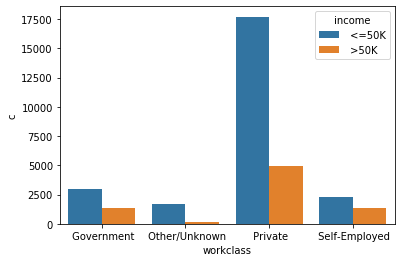

In [47]:
sns.barplot(data=industry_income, x='workclass',y='c',hue='income')

In [48]:
# Relationship between number of years of education and income level
edu_income = adult_train.groupby(['education-num','income']).income.agg('count').to_frame('c').reset_index()
edu_income

,education-num,income,c
0,1,<=50K,50
1,2,<=50K,160
2,2,>50K,6
3,3,<=50K,316
4,3,>50K,16
5,4,<=50K,605
6,4,>50K,40
7,5,<=50K,487
8,5,>50K,27
9,6,<=50K,871


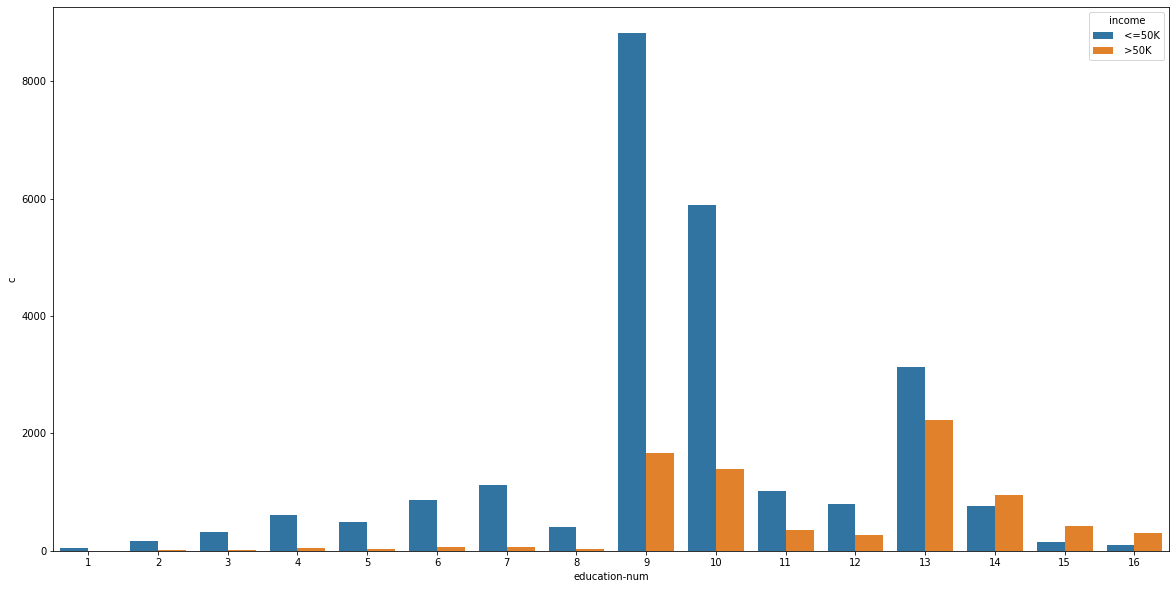

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(data=edu_income, x='education-num',y='c',hue='income')

In [50]:
# Relationship between marital status and income level
adult_train['marital-status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [51]:
adult_train.replace(regex=r'Married.*',value='Married',inplace=True)
adult_train.replace(regex=r'Never.*',value='Single',inplace=True)
adult_test.replace(regex=r'Married.*',value='Married',inplace=True)
adult_test.replace(regex=r'Never.*',value='Single',inplace=True)

In [52]:
marry_income = adult_train.groupby(['marital-status','income']).income.agg('count').to_frame('c').reset_index()

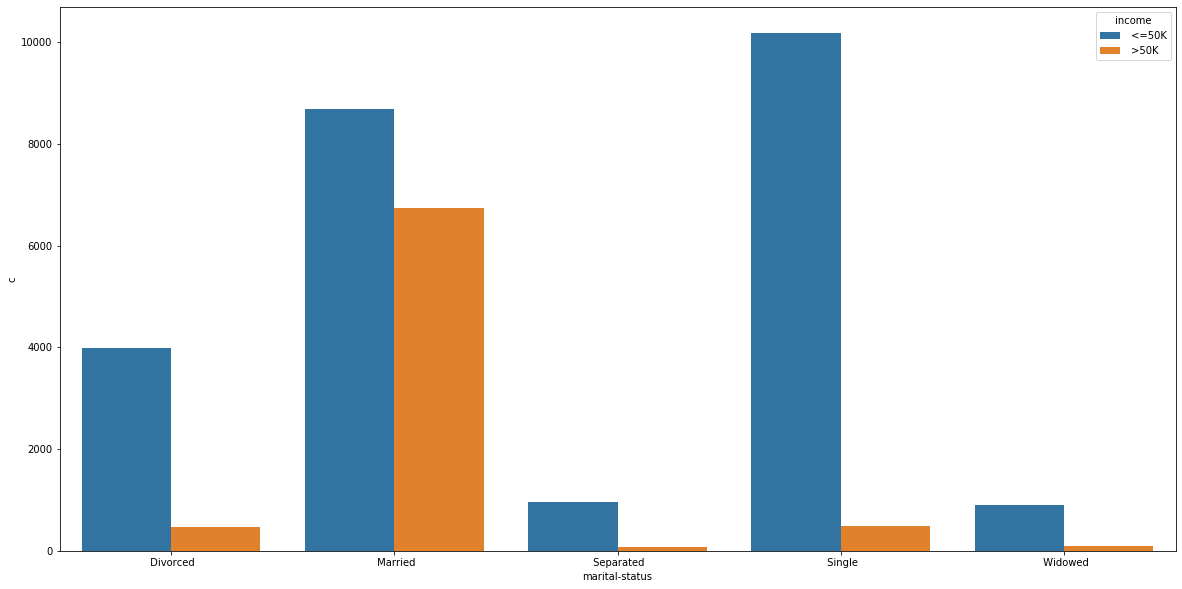

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(data=marry_income, x='marital-status',y='c',hue='income')

In [54]:
# Relationship between race and income level
adult_train['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [55]:
race_income = adult_train.groupby(['race','income']).income.agg('count').to_frame('c').reset_index()
race_income

,race,income,c
0,Amer-Indian-Eskimo,<=50K,275
1,Amer-Indian-Eskimo,>50K,36
2,Asian-Pac-Islander,<=50K,762
3,Asian-Pac-Islander,>50K,276
4,Black,<=50K,2735
5,Black,>50K,387
6,Other,<=50K,246
7,Other,>50K,25
8,White,<=50K,20680
9,White,>50K,7115


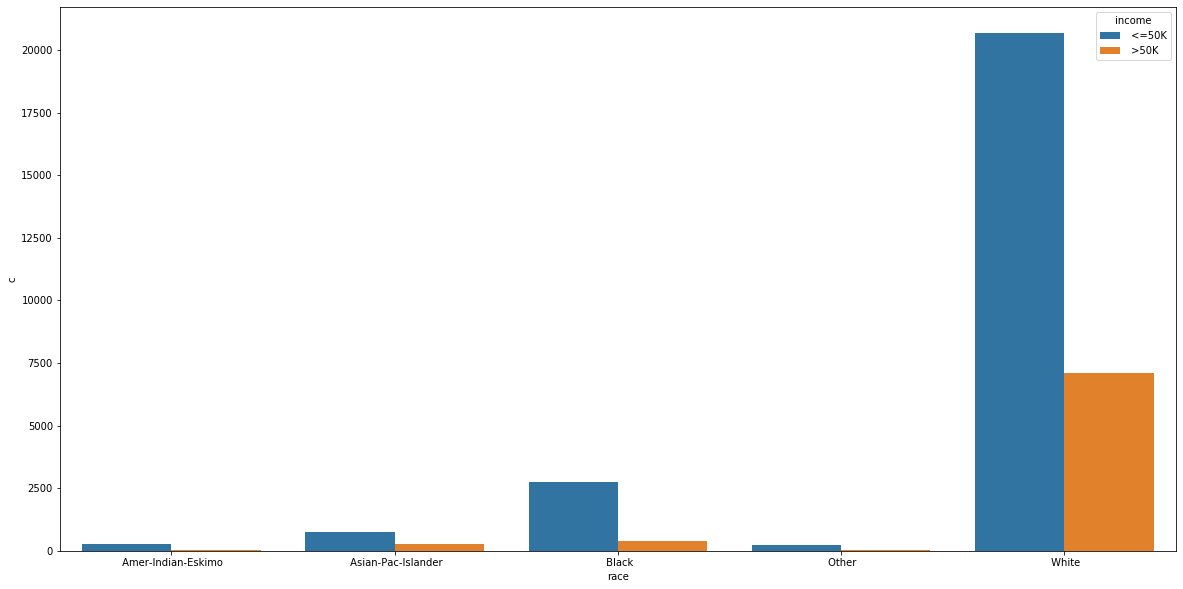

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(data=race_income, x='race',y='c',hue='income')

In [57]:
adult_train.replace(regex=['Adm-clerical','Exec-managerial'],value='White-Collar',inplace=True)
adult_test.replace(regex=['Adm-clerical','Exec-managerial'],value='White-Collar',inplace=True)

In [58]:
adult_train.replace(regex=['Craft-repair','Farming-fishing','Handlers-cleaners','Machine-op-inspct','Transport-moving'],value='Blue-Collar',inplace=True)
adult_test.replace(regex=['Craft-repair','Farming-fishing','Handlers-cleaners','Machine-op-inspct','Transport-moving'],value='Blue-Collar',inplace=True)

In [59]:
adult_train.replace(regex=['Other-service','Protective-serv','Tech-support'],value='Service',inplace=True)
adult_test.replace(regex=['Other-service','Protective-serv','Tech-support'],value='Service',inplace=True)

In [60]:
adult_train.replace(regex=['Prof-specialty'],value='Professional',inplace=True)
adult_test.replace(regex=['Prof-specialty'],value='Professional',inplace=True)

In [61]:
adult_train.replace(regex=[r'\?','Armed-Forces'],value='Other/Unknown',inplace=True)
adult_test.replace(regex=[r'\?','Armed-Forces'],value='Other/Unknown',inplace=True)

In [62]:
# adult_train['workclass'] = adult_train['workclass'].astype('category')
# adult_test['workclass'] = adult_test['workclass'].astype('category')

In [63]:
# adult_train['workclass_cat'] = adult_train['workclass'].cat.codes
# adult_train

In [64]:
adult_train.dtypes[adult_train.dtypes=='object'].index[:-1]

Index(['workclass', 'marital-status', 'occupation', 'race', 'sex',
       'native-country'],
      dtype='object')

In [65]:
dummycol = adult_train.dtypes[adult_train.dtypes=='object'].index[:-1]
census_train= pd.get_dummies(data=adult_train,columns=dummycol,drop_first=True)
census_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Other/Unknown,workclass_ Private,workclass_ Self-Employed,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
census_test= pd.get_dummies(data=adult_test,columns=dummycol,drop_first=True)
census_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Other/Unknown,workclass_ Private,workclass_ Self-Employed,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,226802,7,0,0,40,<=50K.,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K.,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K.,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K.,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K.,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
for column in census_train.columns.tolist():
    if column not in census_test.columns.tolist():
        print(column)

native-country_ Holand-Netherlands


In [68]:
location = census_train.columns.get_loc('native-country_ Holand-Netherlands')
census_test.insert(loc=location,column='native-country_ Holand-Netherlands',value=0)
print(len(census_train.columns),len(census_test.columns))

66 66


In [69]:
census_train['income'] = census_train['income'].apply(lambda x: 0 if x == ' <=50K' else 1)
census_test['income'] = census_test['income'].apply(lambda x: 0 if x == ' <=50K.' else 1)

# Rescaling

In [70]:
X_train = census_train.drop(columns='income')
y_train = census_train['income']

In [71]:
X_test = census_test.drop(columns='income')
y_test = census_test['income']

In [72]:
# X_train = adult_train.drop(columns=['income','income_cat','native-country','sex','marital-status','race','workclass','sex',
#                                    'occupation'])
# y_train = adult_train['income_cat']

In [73]:
# X_test = adult_test.drop(columns=['income','income_cat','native-country','sex','marital-status','race','workclass','sex',
#                                    'occupation'])
# y_test = adult_test['income_cat']

In [74]:
rescalecol=['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss','hours-per-week']

In [75]:
scaler = StandardScaler()
X_train.loc[:,rescalecol] = scaler.fit_transform(X_train.loc[:,rescalecol])
X_test.loc[:,rescalecol] = scaler.transform(X_test.loc[:,rescalecol]) #transform test set without re-training the model

In [76]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Other/Unknown,workclass_ Private,workclass_ Self-Employed,marital-status_ Married,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Resampling

X_train = adult_train.drop(columns=['income','income_cat','native-country','sex','marital-status','race','workclass','sex',
                                   'occupation'])
y_train = adult_train['income_cat']

In [77]:
X_train.shape

(32537, 65)

In [78]:
y_train.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [79]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train,y_train = smote.fit_resample(X_train,y_train)

In [80]:
# from imblearn.over_sampling import SVMSMOTE
# smote = SVMSMOTE(random_state=0)
# X_train,y_train = smote.fit_resample(X_train,y_train)

In [81]:
# from imblearn.combine import SMOTEENN
# smote = SMOTEENN(random_state=0)
# X_train,y_train = smote.fit_resample(X_train,y_train)

In [82]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train,y_train = smote.fit_resample(X_train,y_train)

In [83]:
y_train.value_counts()

0    24698
1     7839
Name: income, dtype: int64

X_test = adult_test.drop(columns=['income','income_cat','native-country','sex','marital-status','race','workclass','sex',
                                   'occupation'])
y_test = adult_test['income_cat']

In [84]:
X_test.shape

(16276, 65)

In [85]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Other/Unknown,workclass_ Private,workclass_ Self-Employed,marital-status_ Married,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Other/Unknown,workclass_ Private,workclass_ Self-Employed,marital-status_ Married,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.996171,0.350729,-1.198407,-0.145975,-0.216743,-0.035664,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042936,-0.947061,-0.420679,-0.145975,-0.216743,0.774269,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.776193,1.394253,0.745913,-0.145975,-0.216743,-0.035664,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.397019,-0.279076,-0.031815,0.894653,-0.216743,-0.035664,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-1.509451,-0.817431,-0.031815,-0.145975,-0.216743,-0.845597,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Logistic Regression

In [87]:
log = LogisticRegression(max_iter=10000)
log.fit(X_train,y_train)
y_predict_train = log.predict(X_train)
y_predict_test = log.predict(X_test)

In [88]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24698
           1       0.73      0.58      0.64      7839

    accuracy                           0.85     32537
   macro avg       0.80      0.75      0.77     32537
weighted avg       0.84      0.85      0.84     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12430
           1       0.72      0.57      0.64      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.75      0.77     16276
weighted avg       0.84      0.85      0.84     16276



In [89]:
print("Confusion Matrix on Train Set")
print(confusion_matrix(y_train,y_predict_train))

Confusion Matrix on Train Set
[[23035  1663]
 [ 3330  4509]]


# KNN

In [90]:
# k_range = range(1,20,2)
# scorelist = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     y_predict_train = knn.predict(X_train)
#     scorelist.append(metrics.accuracy_score(y_train,y_predict_train))
# print(scorelist)

In [91]:
# plt.plot(k_range,scorelist)
# plt.xlabel('n_neighbors_val')
# plt.ylabel('accuracy_score')
# plt.show()

In [92]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,25,2)}
knnSearch = GridSearchCV(knn,parameters,n_jobs=-1)
knnSearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 25, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
y_predict_train = knnSearch.predict(X_train)
y_predict_test = knnSearch.predict(X_test)

In [94]:
print(knnSearch.best_estimator_)
print(knnSearch.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')
0.8403359192676906


In [95]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     24698
           1       0.74      0.60      0.66      7839

    accuracy                           0.85     32537
   macro avg       0.81      0.77      0.78     32537
weighted avg       0.85      0.85      0.85     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12430
           1       0.71      0.57      0.64      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.75      0.77     16276
weighted avg       0.84      0.85      0.84     16276



In [96]:
KnnScore = metrics.accuracy_score(y_train,y_predict_train)
print(KnnScore)

0.8528444540062083


In [96]:
# #randomized serach with cross validation for test data
# knn = KNeighborsClassifier()
# parameters = {'n_neighbors':range(1,20,2)}
# knnSearch = RandomizedSearchCV(knn,parameters,cv=5,n_jobs=-1)
# knnSearch.fit(X_test,y_test)

# SVC

In [97]:
svc = SVC(random_state=0)
parameters = {'C':(0.1,1,10,50)}
svcSearch = RandomizedSearchCV(svc,parameters,n_jobs=-1)
svcSearch.fit(X_train,y_train)

C:\Users\Lawbin\Anaconda3\envs\FTDS\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=0,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': (0.1, 1, 10, 50)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [98]:
y_predict_train = svcSearch.predict(X_train)
y_predict_test = svcSearch.predict(X_test)

In [99]:
print(svcSearch.best_estimator_)
print(svcSearch.best_score_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
0.8508469438000154


In [100]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     24698
           1       0.79      0.56      0.65      7839

    accuracy                           0.86     32537
   macro avg       0.83      0.75      0.78     32537
weighted avg       0.85      0.86      0.85     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12430
           1       0.77      0.54      0.64      3846

    accuracy                           0.85     16276
   macro avg       0.82      0.75      0.77     16276
weighted avg       0.85      0.85      0.84     16276



In [101]:
svcScore = metrics.accuracy_score(y_train,y_predict_train)
print(svcScore)

0.8565940314103944


# XGBoost

In [102]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
parameters = {'max_depth':np.arange(2,10),'learning_rate':(0.1,0.5,1,1.5)}
xgbSearch = GridSearchCV(xgb,parameters,n_jobs=-1)
xgbSearch.fit(X_train,y_train)
y_predict_train = xgbSearch.predict(X_train)
y_predict_test = xgbSearch.predict(X_test)

In [103]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     24698
           1       0.80      0.63      0.70      7839

    accuracy                           0.87     32537
   macro avg       0.85      0.79      0.81     32537
weighted avg       0.87      0.87      0.87     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12430
           1       0.79      0.62      0.69      3846

    accuracy                           0.87     16276
   macro avg       0.84      0.78      0.81     16276
weighted avg       0.87      0.87      0.86     16276



In [104]:
XGBoostScore = metrics.accuracy_score(y_train,y_predict_train)
print(XGBoostScore)

0.8731290530780342


# Random Forest

In [105]:
forest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':(100,200,300),'max_depth':(3,5,10)}
forestSearch = RandomizedSearchCV(forest,parameters,n_jobs=-1)
forestSearch.fit(X_train,y_train)

C:\Users\Lawbin\Anaconda3\envs\FTDS\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [106]:
y_predict_train =forestSearch.predict(X_train)
y_predict_test =forestSearch.predict(X_test)

In [107]:
print(forestSearch.best_estimator_)
print(forestSearch.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
0.8549960663609489


In [108]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.87      0.97      0.91     24698
           1       0.84      0.53      0.65      7839

    accuracy                           0.86     32537
   macro avg       0.85      0.75      0.78     32537
weighted avg       0.86      0.86      0.85     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12430
           1       0.82      0.51      0.63      3846

    accuracy                           0.86     16276
   macro avg       0.84      0.74      0.77     16276
weighted avg       0.85      0.86      0.84     16276



In [109]:
RandomForestScore = metrics.accuracy_score(y_train,y_predict_train)
print(RandomForestScore)

0.8610812305990103


In [110]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

# Decision Tree

In [111]:
tree = DecisionTreeClassifier(random_state=0)
parameters = {'criterion':("gini", "entropy"),'max_depth':(3,5,10)}
treeSearch = RandomizedSearchCV(tree,parameters,n_jobs=-1)
treeSearch.fit(X_train,y_train)

C:\Users\Lawbin\Anaconda3\envs\FTDS\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
          

In [112]:
y_predict_train = treeSearch.predict(X_train)
y_predict_test = treeSearch.predict(X_test)

In [113]:
print(treeSearch.best_estimator_)
print(treeSearch.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
0.8507240559526033


In [114]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     24698
           1       0.75      0.66      0.70      7839

    accuracy                           0.86     32537
   macro avg       0.82      0.79      0.81     32537
weighted avg       0.86      0.86      0.86     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12430
           1       0.72      0.63      0.67      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.78      0.79     16276
weighted avg       0.85      0.85      0.85     16276



# Gradient Boost

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
parameters = {'n_estimators':(100,200,300),'max_depth':(2,3,4)}
gbcSearch = GridSearchCV(estimator=gbc,param_grid=parameters,cv=5,n_jobs=1)
gbcSearch.fit(X_train,y_train)
y_predict_train = gbcSearch.predict(X_train)
y_predict_test = gbcSearch.predict(X_test)

In [116]:
print("Classification Report on Train Set")
print(classification_report(y_train,y_predict_train))
print("Classification Report on Test Set")
print(classification_report(y_test,y_predict_test))

Classification Report on Train Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     24698
           1       0.80      0.66      0.72      7839

    accuracy                           0.88     32537
   macro avg       0.85      0.80      0.82     32537
weighted avg       0.87      0.88      0.87     32537

Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12430
           1       0.78      0.64      0.70      3846

    accuracy                           0.87     16276
   macro avg       0.84      0.79      0.81     16276
weighted avg       0.87      0.87      0.87     16276

